![Cart Spring Problem Question and Diagram](imgs/cart_spring_pendulum.png)

Result:

![Simulated Result](imgs/cart_spring_pendulum_simulation.gif)

Let $x$ be the distance in the x direction from equilibrium position for body $m_1$

In [1]:
# Variable definitions
from mathpad import *

x = "x(t)" * m
m1 = "m1" * kg

theta = "theta(t)" * radians
m2 = "m2" * kg

k = "k" * N / m
l = "l" * m

F = "F(t)" * N
g = "g" * meter / s**2

O = R2("O") # Origin

In [2]:
print("Position of m1")
r_1 = O[x, 0]
r_1

Position of m1


O[x(t), 0]

In [3]:
print("Position of m2")
# convert theta to anticlockwise wrt +x axis
theta_wrt_xplus = pi/2 - theta

r_2 = r_1 + O.from_polar(l, theta_wrt_xplus)
r_2

Position of m2


O[l*sin(theta(t)) + x(t), l*cos(theta(t))]

In [4]:
r_2

O[l*sin(theta(t)) + x(t), l*cos(theta(t))]

In [5]:
print("Velocity of m2 wrt origin")

v_2 = diff(r_2)
v_2

Velocity of m2 wrt origin


Unknown2D[l*cos(theta(t))*Derivative(theta(t), t) + Derivative(x(t), t), -l*sin(theta(t))*Derivative(theta(t), t)]

In [6]:
# Kinetic energy
from mathpad.mech import kinetic_energy, elastic_energy, euler_lagrange, gravitational_energy

print("Kinetic Energy")
T = kinetic_energy(m1, diff(x)) + kinetic_energy(m2, abs(v_2))
T

Kinetic Energy


0.5*mDerivative(x(t), t)**2 + 0.5*m2*(l**2*Derivative(theta(t), t)**2 + 2*l*cos(theta(t))*Derivative(theta(t), t)*Derivative(x(t), t) + Derivative(x(t), t)**2) kilogram*meters**2/second**2

In [7]:
print("Potential Energy")
V = elastic_energy(k, x) + gravitational_energy(m2, r_2.j, g)
V

Potential Energy


g*l*m2*cos(theta(t)) + 0.5*k*x(t)**2 meter*newtons

In [8]:
print("Dynamics of Body 1")
x_dynamics = euler_lagrange(T, V, F, x)
x_dynamics

Dynamics of Body 1


F(t) = k*x(t) + mDerivative(x(t), (t, 2)) + m2*(-l*sin(theta(t))*Derivative(theta(t), t)**2 + l*cos(theta(t))*Derivative(theta(t), (t, 2)) + Derivative(x(t), (t, 2))) newton

In [9]:
print("Dynamics of Body 2")
theta_dynamics = euler_lagrange(T, V, 0, theta)
theta_dynamics

Dynamics of Body 2


l*m2*(-g*sin(theta(t)) + l*Derivative(theta(t), (t, 2)) + cos(theta(t))*Derivative(x(t), (t, 2))) = 0 kilogram*meter**2/(radian*second**2)

In [10]:
# simulate with these substitutions:

simulation_subs = {
    k: 100,
    m1: 10,
    m2: 1,
    l: 0.5,
    g: 9.81,
    # A small perturbation
    F: piecewise(t, [
        # t < 1s: 1 N
        (1, 1 * N),
        # t >= 1s: 0 N
        (float('inf'), 0 * N)
    ])
}

Solving subbed Equations...
Solving finished.
Simulating from t=0 to t=20 with a max_step of 0.01.


  0%|          | 0/20 [00:00<?, ?it/s]

Simulation finished. Plotting...


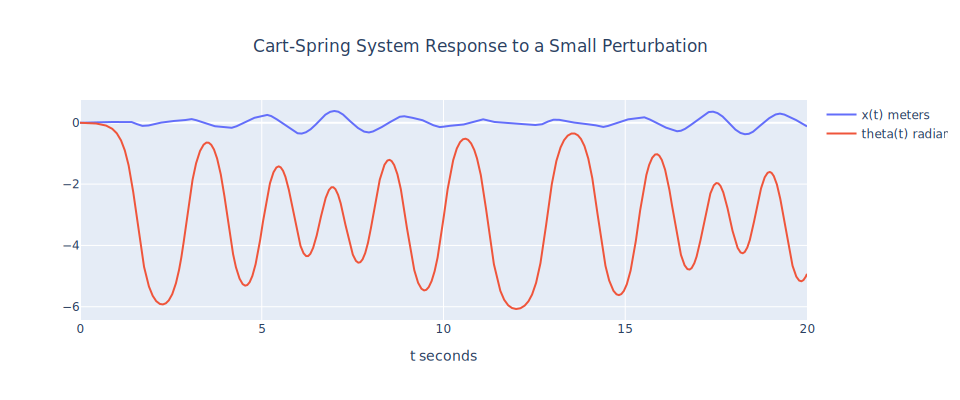

In [11]:
sim_data = simulate_dynamic_system(
    [x_dynamics, theta_dynamics],
    plot_title="Cart-Spring System Response to a Small Perturbation",
    x_f=20, max_step=0.01,
    substitute=simulation_subs,
    initial_conditions={
        x: 0,
        diff(x): 0,
        theta: 0,
        diff(theta): 0
    },
    record=[x, theta],
    plot_static=True
)

In [12]:
from sympy import lambdify
import numpy as np

r_1_subbed = subs(r_1, simulation_subs).val
r_2_subbed = subs(r_2, simulation_subs).val

f_rs = lambdify([x.val, theta.val], [r_1_subbed, r_2_subbed])

In [13]:
r_1sim, r_2sim = f_rs(
    [x for t, (x, theta) in sim_data],
    [theta for t, (x, theta) in sim_data]
)
t_sim = np.array([t for t, (x, theta) in sim_data])

<lambdifygenerated-2>:2: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [14]:
import plotly.graph_objects as go

def get_title(t):
    return f"Cart-Spring System Response to a Small Perturbation (t={t:.2f}s)"

fig = go.FigureWidget().add_scatter().add_scatter()
fig.layout.title = get_title(t=0)
fig.update_xaxes(range=[-0.5, 0.5], title="x (m)")
fig.update_yaxes(range=[-0.6, 0.6], scaleanchor="x", scaleratio=1, title="y (m)")
display(fig)

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '3534ef64-5cb0-40e3-9f22-30bb7abca754'},
             {…

In [15]:
from ipywidgets import interact

r_1_scatter = fig.data[0]
r_2_scatter = fig.data[1]

r_1_scatter.name = "displacement of m1"
r_2_scatter.name = "displacement of m2"

@interact(i=(0, len(sim_data)-1))
def show_cart_spring_pendulum(i=0):
    r_1_x, r_1_y = r_1sim[0, 0][i], 0
    r_2_x, r_2_y = r_2sim[0, 0, i], r_2sim[1, 0, i]
    
    with fig.batch_update():
        fig.layout.title = get_title(t=t_sim[i])

        r_1_scatter.x = [0, r_1_x]
        r_1_scatter.y = [0, r_1_y]

        r_2_scatter.x = [r_1_x, r_2_x]
        r_2_scatter.y = [r_1_y, r_2_y]


interactive(children=(IntSlider(value=0, description='i', max=12013), Output()), _dom_classes=('widget-interac…

In [18]:
import io
from PIL import Image
from moviepy.video.VideoClip import VideoClip

def plotly_fig2array(fig):
    "from https://community.plotly.com/t/how-to-export-animation-and-save-it-in-a-video-format-like-mp4-mpeg-or/64621/2"
    #convert Plotly fig to  an array
    fig_bytes = fig.to_image(format="png", scale=1)
    buf = io.BytesIO(fig_bytes)
    img = Image.open(buf)
    return np.asarray(img)

def make_frame(t):
    idx = np.abs(t_sim - t).argmin()
    show_cart_spring_pendulum(idx)
    return plotly_fig2array(fig)

# animate and save as gif
animation = VideoClip(make_frame, duration=20)
animation.write_gif("imgs/cart_spring_pendulum_simulation.gif", fps=20)

                                                              
t:  62%|██████▏   | 247/400 [00:39<00:08, 17.75it/s, now=None]

MoviePy - Building file imgs/cart_spring_pendulum_simulation.gif with imageio.


![Simulated Result](imgs/cart_spring_pendulum_simulation.gif)